In [1]:
import pandas as pd
import geopandas as gp
import numpy as np 
import os
import fiona
from statistics import mean, median
import string

# VEST MO 2020
---

## VEST Documentation

### Sources

#### Election Results
Election results from the Missouri Secretary of State via OpenElections (https://github.com/openelections/openelections-data-mo/tree/master/2020).   Absentee, provisional, and mail ballots were reported countywide in nearly every county. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.

#### Shapefiles
Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. Monroe County from the 2010 Census VTD release. Platte County from the 2020 Census VTD release. The following counties instead used maps or shapefiles sourced from the respective county governments: Audrain, Bates, Caldwell, Callaway, Camden, Cape Girardeau, Cedar, Cooper, Franklin, Greene, Jackson, Jasper, Jefferson, Laclede, Lafayette, Lawrence, Marion, McDonald, Miller, Nodaway, Osage, Ozark, Pemiscot, Pike, Randolph, Scott, St. Louis, Ste. Genevieve, Texas, Warren, Washington, Worth, Wright.

### Processing
Precinct merges were made in the following counties to match consolidated reporting units: Andrew, Audrain, Barry, Benton, Bollinger, Boone, Buchanan, Butler, Callaway, Camden, Cape Girardeau, Carroll, Carter, Cass, Christian, Clark, Cole, Cooper, Crawford, Dade, Dallas, Daviess, Dekalb, Douglas, Dunklin, Franklin, Gentry, Greene, Grundy, Hickory, Holt, Howard, Howell, Jackson, Jasper, Jefferson, Johnson, Linn, Livingston, Marion, Mercer, Mississippi, Moniteau, Morgan, New Madrid, Nodaway, Oregon, Osage, Pemiscot, Perry, Pettis, Phelps, Platte, Polk, Putnam, Ralls, Randolph, Ray, Ripley, St. Clair, St. Francois, Schuyler, Scotland, Shannon, Shelby, Stoddard, Stone, Sullivan, Taney, Vernon, Warren, Wayne, Webster, Worth.

The following additional modifications were made to match how election results were reported in 2020.

Audrain: Add Vandalia City; Align Mexico precincts with municipal code  
Barry: Add Monett City; Align Cassville with corporate boundary  
Barton: Adjust Lamar ward boundaries to match city map  
Bollinger: Adjust Patton/Sedgewickville to match county GIS  
Buchanan: Split Central Assembly between Ashland UM, Sojourn, Visitors Bureau  
Butler: Align Poplar Bluff with corporate boundary and adjust wards to match city map  
Callaway: Align Fulton, Holts Summit precincts with 2020 corporate boundaries  
Carroll: Adjust Carrollton ward boundaries to match voter file  
Carter: Split Hunter between Ellsinore/Grandin by zip code  
Cass: Align Belton, Peculiar, Pleasant Hill, Raymore precincts with corporate boundaries; Adjust 37 Pleasant Prairie/25 West Peculiar Rural  
Chariton: Adjust Salisbury wards to match city map  
Christian: Align Rosedale, Union Chapel precincts with Nixa 2020 corporate boundary; Revise Cassidy 1/Cassidy 2  
Clay: Split KC Lib 21-5/7, 21-27/28; Merge Gallatin 6/9 to match GIS; Adjust Excelsior Springs, Kearney, Smithville precincts to match 2020 ward and corporate boundaries; Adjust KC 21-1/15, 21-1/17, 21-3/11, 21-4/6, 21-4/11, 21-5/7/24, 21-6/24, 21-7/20, 21-13/26, 21-14/23, 21-17/16, 21-17/26, 21-27/28, 21-17/Platte 1, Gallatin 7/16, 10/13, 10/16, 11/15, 13/15, Kearney 3/Platte 2, Liberty 1/10, 6/13, 7/11, 11/14, Washington 1/3 to match voter file  
Clinton: Align Atchison/Concord, Jackson/Lathrop with 2020 precinct split assignments  
Cole: Adjust Marion Twp St Martins to include St Martins city in Jefferson Twp  
Crawford: Move Benton Twp section of Leasburg precinct from Recklein to Leasburg  
Dallas: Split N Benton Inside/OCL, S Benton Inside/OCL; Align N/S Benton with Buffalo ward map  
Dent: Split Boss precinct from R-4 precinct; Adjust R-2/R-3 boundary  
Dunklin: Align Holcomb, Rives with township boundaries; Adjust Arbyrd/Senath; Align Kennett wards with city map  
Franklin: Split Dry Branch between Stanton & St. Clair Out of Town  
Gasconade: Align Hermann, Owensville, Rosebud with corporate boundaries and ward descriptions  
Holt: Split West between Central/Northwest by school district  
Howell: Align West Plains precincts with 2020 corporate boundary  
Iron: Adjust Annapolis/Des Arc/Vulcan, Ironton/Pilot Knob  
Jasper: Realign Carthage 2/3, Joplin 1/7, 10/13, 10/15, 13/22, 25/Rex, Oronogo 1/2, Webb City 1/4 to match city ward maps  
Jefferson: Split Festus Ward 1 P1/P2, Ward 3 P1/P2, Ward 4 P1/P2; Adjust Crystal City/Riverview  
Johnson: Adjust Warrensburg NE/NW boundary to match county maps  
Lewis: Split LaBelle Twp between LaBelle FS/Lewistown FS with PLSS grid  
Lincoln: Align Moscow Mills, Troy with 2020 corporate boundaries; Adjust Briscoe/Troy Rural; Split Foley between Elsberry/Winfield, Silex between Briscoe/Millwood/Whiteside to match county GIS  
Linn: Split Brookfield Township between Brookfield 1&2/3&4  
Livingston: Align Chillicothe with 2020 corporate boundaries  
Macon: Align Macon City wards with corporate boundaries  
Madison: Align Fredericktown wards with corporate boundaries  
Marion: Split Fabius-Smileyville/Taylor, Warren-Monroe City/Warren; Align Hannibal wards with voter file  
Miller: Adjust all precinct boundaries to match voter file  
Mississippi: Adjust Bertrand/East Prairie Rural; Align East Prairie City with corporate boundary  
Montgomery: Align Bellflower/Middletown, Big Spring/Rhineland with voter file  
Morgan: Adjust Versailles North/South boundary to match county GIS  
New Madrid: Add New Madrid City wards; Add Big Prairie 4 precinct; Move Portageville Ward 1 to Portage 1  
Newton: Align Staples precincts with Joplin City GIS boundaries; Align Neosho precincts with Neosho City GIS boundaries; Adjust Newtonia/Ritchey Wentworth  
Pettis: Adjust Sedalia City wards to match city map  
Phelps: Align Rolla with corporate boundary and St. James wards with city maps  
Pike: Adjust Cuivre JL boundaries with Ashley NO, Buffalo E, Prairieville I  
Platte: Align Lake Waukomis, Parkville, Platte City, Riverside/Northmore, Weatherby Lake with corporate boundaries; Adjust Platte Hills/Park Hill, Seven Bridges/Shiloh  
Polk: Split Campbell, Jefferson, Union precincts by school district  
Pulaski: Adjust Big Piney/St. Roberts, Laquey/Waynesville  
Putnam: Split Union Twp into NE/SW precincts to match county map  
Ralls: Replace Center/Liberty precincts with 2010 VTDs  
Ray: Adjust Homestead Village/Wood Heights/Lawson, Richmond/Orrick  
Reynolds: Realign precincts countywide to match voter file  
Saline: Split Nelson precinct from Hardeman precinct; Adjust Marshall 2/3 boundary  
St. Charles: Split 180/Community; Adjust Brian/Ridgepoint, Civic/St. Paul, Harvester/Sycamore, Mamelle/Marina  
St. Francois: Align Desloge, Farmington, Park Hills with corporate boundaries and city ward maps; Adjust Bonne Terre/Timberline, Patterson/Timberline, Leadwood/Park Hills to match voter file  
Scott: Adjust Haywood City/Morley, Sikeston 1/McMullin/Vanduser  
Shannon: Align all precincts with county GIS and voter file  
Shelby: Adjust Jackson/North River to match voter file  
Stoddard: Adjust Advance/Leora, Bernie/Dexter/Pyle, Bloomfield/Essex/Gray Ridge  
Stone: Move Branson West from Ruth A to Ruth C; Adjust Ruth B City/Rural to match county GIS  
Taney: Adjust Boston Center/Walnut Shade; Align Branson wards with 2020 corporate boundary  
Vernon: Align Bronaugh/Moundville, Harwood/Schell City with voter file  
Washington: Adjust City Hall/Stony Point, Cruise/Richwoods to match county GIS  

### Races

G20PRERTRU - Donald J. Trump (Republican Party)  
G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PREGHAW - Howie Hawkins (Green Party)  
G20PRECBLA - Don Blankenship (Constitution Party)  

G20GOVRPAR - Mike Parson (Republican Party)  
G20GOVDGAL - Nicole Galloway (Democratic Party)  
G20GOVLCOM - Rik Combs (Libertarian Party)  
G20GOVGBAU - Jerome Howard Bauer (Green Party)  

G20LTGRKEH - Mike Kehoe (Republican Party)  
G20LTGDCAN - Alissia Canady (Democratic Party)  
G20LTGLSLA - Bill Slantz (Libertarian Party)  
G20LTGGDRA - Kelley Dragoo (Green Party)  

G20ATGRSCH - Eric Schmitt (Republican Party)  
G20ATGDFIN - Rich Finneran (Democratic Party)  
G20ATGLBAB - Kevin C. Babcock (Libertarian Party)  

G20SOSRASH - John R. (Jay) Ashcroft (Republican Party)  
G20SOSDFAL - Yinka Faleti (Democratic Party)  
G20SOSLFRE - Carl Herman Freese (Libertarian Party)  
G20SOSGLEH - Paul Lehmann (Green Party)  
G20SOSCVEN - Paul Venable (Constitution Party)  

G20TRERFIT - Scott Fitzpatrick (Republican Party)  
G20TREDENG - Vicki Lorenz Englund (Democratic Party)  
G20TRELKAS - Nicholas (Nick) Kasoff (Libertarian Party)  
G20TREGCIV - Joseph Civettini (Green Party)  

## Election Result Processing

### Load in VEST file

In [2]:
vest_mo_20 = gp.read_file("./raw-from-source/VEST/mo_2020/mo_2020.shp")

In [3]:
display(vest_mo_20)

,STATEFP,COUNTYFP,NAME,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20GOVRPAR,G20GOVDGAL,...,G20SOSRASH,G20SOSDFAL,G20SOSLFRE,G20SOSGLEH,G20SOSCVEN,G20TRERFIT,G20TREDENG,G20TRELKAS,G20TREGCIV,geometry
0,29,201,Commerce,295,75,2,4,0,294,81,...,296,65,5,2,2,290,73,8,2,"POLYGON ((-89.44957 37.06921, -89.44957 37.068..."
1,29,043,West Finley,1646,528,41,4,2,1642,519,...,1664,437,54,16,19,1652,445,63,6,"POLYGON ((-93.26533 37.04093, -93.26521 37.040..."
2,29,175,Huntsville,549,128,8,1,1,518,153,...,546,115,12,6,5,543,122,6,7,"POLYGON ((-92.56115 39.42815, -92.56035 39.428..."
3,29,165,Barry East,1206,1386,42,15,7,1237,1353,...,1334,1189,62,19,11,1268,1235,73,24,"POLYGON ((-94.60068 39.26755, -94.60070 39.266..."
4,29,135,California 3,639,210,18,3,1,651,201,...,664,172,12,5,6,652,182,19,3,"POLYGON ((-92.57752 38.62075, -92.57742 38.624..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,29,021,Sojourn on Savannah Ave,1016,654,29,8,6,984,638,...,1064,506,45,28,20,963,591,58,23,"POLYGON ((-94.88064 39.79789, -94.87991 39.799..."
3729,29,021,Ashland United Methodist Church,1307,990,34,8,4,1291,975,...,1431,767,47,27,18,1334,847,60,14,"POLYGON ((-94.83908 39.77830, -94.83908 39.778..."
3730,29,035,Grandin,366,50,2,1,0,352,45,...,358,39,4,1,0,351,45,7,1,"POLYGON ((-90.94673 36.81755, -90.94667 36.817..."
3731,29,155,Cooter/Tyler/Holland,491,46,4,1,0,456,60,...,461,42,2,5,0,451,50,3,4,"POLYGON ((-89.85973 35.99991, -89.85990 35.999..."


In [4]:
races = [i for i in vest_mo_20.columns if "G20" in i]

### Load Election Results

In [5]:
mo_elections = pd.read_csv("./raw-from-source/Open_Elections/openelections-data-mo-master/2020/20201103__mo__general__precinct.csv")

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
mo_elections

,county,precinct_code,precinct,office,district,candidate,party,votes
0,Adair,1,SW1-DFS,President,NaN,Donald J. Trump,REP,311.0
1,Adair,2,SE2-REHOBOTH,President,NaN,Donald J. Trump,REP,547.0
2,Adair,3,SE3-MOOSE,President,NaN,Donald J. Trump,REP,172.0
3,Adair,4,NE4-ANNEX,President,NaN,Donald J. Trump,REP,300.0
4,Adair,5,NE5-LIBRARY,President,NaN,Donald J. Trump,REP,330.0
...,...,...,...,...,...,...,...,...
132118,Wright,13,MANES,State Representative,141.0,Hannah S. Kelly,REP,332.0
132119,Wright,20,UNION,State Representative,141.0,Hannah S. Kelly,REP,648.0
132120,Wright,21,CENTRAL POLLING LOCATION,State Representative,141.0,Hannah S. Kelly,REP,12.0
132121,Wright,22,FEDERAL,State Representative,141.0,Hannah S. Kelly,REP,0.0


### Clean Election Results

#### Filter down to correct offices and candidates

In [7]:
#Print the offices in this file
mo_elections["office"].unique()

array(['President', 'Governor', 'Lieutenant Governor',
       'Secretary of State', 'State Treasurer', 'Attorney General',
       'U.S. House', 'State Representative', 'State Senate',
       'Circuit Judge - Circuit 32 Division 1',
       'Circuit Judge - Circuit 13 Division 4',
       'Circuit Judge - Circuit 36',
       'Circuit Judge - Circuit 26 Division 3',
       'Circuit Judge - Circuit 19 Division 2',
       'Circuit Judge - Circuit 19 Division 3',
       'Circuit Judge - Circuit 42 Division 2',
       'Circuit Judge - Circuit 23 Division 2',
       'Circuit Judge - Circuit 11 Division 1'], dtype=object)

In [8]:
#Filter down to the races we are interested in
mo_elections = mo_elections[mo_elections["office"].isin(['President', 'Governor', 'Lieutenant Governor',
       'Secretary of State', 'State Treasurer', 'Attorney General'])]

In [9]:
#Take a look at which candidates are included in these races
mo_elections["candidate"].unique()

array(['Donald J. Trump', 'Joseph R. Biden', 'Jo Jorgensen',
       'Howie Hawkins', 'Don Blankenship', 'Kasey Wells', 'Jade Simmons',
       'Brian Carroll', 'Gloria LaRiva', 'Mike Parson', 'Nicole Galloway',
       'Rik Combs', 'Jerome Howard Bauer', 'Arnie C. AC Dienoff',
       'Theo (Ted) Brown Sr', 'Martin Lindstedt', 'Mike Kehoe',
       'Alissia Canady', 'Bill Slantz', 'Kelley Dragoo', 'Jeremy Gundel',
       'John R. (Jay) Ashcroft', 'Yinka Faleti', 'Carl Herman Freese',
       'Paul Lehmann', 'Paul Venable', 'Scott Fitzpatrick',
       'Vicki Lorenz Englund', 'Nicholas (Nick) Kasoff',
       'Joseph Civettini', 'Eric Schmitt', 'Rich Finneran',
       'Kevin C Babcock', 'Kasey Wells, Rachel Wells', 'Kevin C. Babcock',
       'Alissia Canaday'], dtype=object)

In [10]:
#Create a dictionary of name changes
candidate_name_change_dict = {
    'Donald J. Trump':'G20PRERTRU', 
    'Joseph R. Biden':'G20PREDBID',
    'Jo Jorgensen':'G20PRELJOR',
    'Howie Hawkins':'G20PREGHAW', 
    'Don Blankenship':'G20PRECBLA', 
    'Kasey Wells':'filter_out', 
    'Jade Simmons':'filter_out',
    'Brian Carroll':'filter_out', 
    'Gloria LaRiva':'filter_out', 
    'Mike Parson':'G20GOVRPAR', 
    'Nicole Galloway':'G20GOVDGAL',
    'Rik Combs':'G20GOVLCOM', 
    'Jerome Howard Bauer':'G20GOVGBAU', 
    'Arnie C. AC Dienoff':'filter_out',
    'Theo (Ted) Brown Sr':'filter_out', 
    'Martin Lindstedt':'filter_out',
    'Mike Kehoe':'G20LTGRKEH',
    'Alissia Canady':'G20LTGDCAN', 
    'Bill Slantz':'G20LTGLSLA',
    'Kelley Dragoo':'G20LTGGDRA', 
    'Jeremy Gundel':'filter_out',
    'John R. (Jay) Ashcroft':'G20SOSRASH', 
    'Yinka Faleti':'G20SOSDFAL', 
    'Carl Herman Freese':'G20SOSLFRE',
    'Paul Lehmann':'G20SOSGLEH', 
    'Paul Venable':'G20SOSCVEN', 
    'Scott Fitzpatrick':'G20TRERFIT',
    'Vicki Lorenz Englund':'G20TREDENG', 
    'Nicholas (Nick) Kasoff':'G20TRELKAS',
    'Joseph Civettini':'G20TREGCIV', 
    'Eric Schmitt':'G20ATGRSCH', 
    'Rich Finneran':'G20ATGDFIN',
    'Kevin C Babcock':'G20ATGLBAB', 
    'Kasey Wells, Rachel Wells':'filter_out', 
    'Kevin C. Babcock':'G20ATGLBAB',
    'Alissia Canaday' :'G20LTGDCAN' 
}

In [11]:
#Apply the changes from the dictionary
mo_elections["candidate"] = mo_elections["candidate"].map(candidate_name_change_dict).fillna(mo_elections["candidate"])

#Filter out the candidates we don't need
mo_elections = mo_elections[mo_elections["candidate"]!="filter_out"]

<ipython-input-11-6508cc0daaf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo_elections["candidate"] = mo_elections["candidate"].map(candidate_name_change_dict).fillna(mo_elections["candidate"])


#### Add a FIPS columns

In [12]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Missouri"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
mo_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

In [13]:
mo_changes = {'De Kalb':'Dekalb','Kansas City':'Jackson','McDonald':'Mcdonald',
              'St. Charles':'St Charles','St. Clair':'St Clair',
              'Ste. Genevieve':'Ste Genevieve','St. Francois':'St Francois',
              'St. Louis City':'St Louis City','St. Louis County':'St Louis'}
mo_elections['county_new'] = mo_elections['county'].map(mo_changes).fillna(mo_elections['county'])
mo_elections['COUNTYFP'] = mo_elections['county_new'].map(mo_fips_dict).fillna(mo_elections['county'])


### Pivot Election Results

In [14]:
mo_elections["unique_ID"]=mo_elections["COUNTYFP"]+"-"+mo_elections["precinct"]

#Pivot election results
mo_elections_pivot = pd.pivot_table(mo_elections,index=["unique_ID","COUNTYFP","precinct","county"],columns=["candidate"],values=['votes'],aggfunc=sum)

#Clean up dataframe NA values, index, and names
mo_elections_pivot = mo_elections_pivot.fillna(0)
mo_elections_pivot.columns = mo_elections_pivot.columns.droplevel(0)
mo_elections_pivot.reset_index(drop=False,inplace=True)

In [15]:
#Cast the vote columns to integers
for i in races:
    mo_elections_pivot[i] = mo_elections_pivot[i].astype(int)

In [16]:
#Re-order the races to match VEST
mo_elections_pivot = mo_elections_pivot[['unique_ID', 'COUNTYFP', 'precinct',"county",'G20PRERTRU',
 'G20PREDBID',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20PRECBLA',
 'G20GOVRPAR',
 'G20GOVDGAL',
 'G20GOVLCOM',
 'G20GOVGBAU',
 'G20LTGRKEH',
 'G20LTGDCAN',
 'G20LTGLSLA',
 'G20LTGGDRA',
 'G20ATGRSCH',
 'G20ATGDFIN',
 'G20ATGLBAB',
 'G20SOSRASH',
 'G20SOSDFAL',
 'G20SOSLFRE',
 'G20SOSGLEH',
 'G20SOSCVEN',
 'G20TRERFIT',
 'G20TREDENG',
 'G20TRELKAS',
 'G20TREGCIV']]

## Compare Election Result Totals

### Compare Total Votes

In [17]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_mo_20[i])
    sum_var_2 += np.sum(mo_elections_pivot[i])
print(sum_var_1)
print(sum_var_2)

17874197
17516919


### Compare Race Totals

In [18]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [19]:
statewide_totals_check(vest_mo_20,mo_elections_pivot,races)

***Statewide Totals Check***
G20PRERTRU has a difference of 24557 votes
	VEST: 1718736 votes
	SOURCES: 1694179 votes
G20PREDBID has a difference of 37238 votes
	VEST: 1253014 votes
	SOURCES: 1215776 votes
G20PRELJOR has a difference of 448 votes
	VEST: 41205 votes
	SOURCES: 40757 votes
G20PREGHAW has a difference of 127 votes
	VEST: 8283 votes
	SOURCES: 8156 votes
G20PRECBLA has a difference of 95 votes
	VEST: 3919 votes
	SOURCES: 3824 votes
G20GOVRPAR has a difference of 23514 votes
	VEST: 1720202 votes
	SOURCES: 1696688 votes
G20GOVDGAL has a difference of 35479 votes
	VEST: 1225771 votes
	SOURCES: 1190292 votes
G20GOVLCOM has a difference of 561 votes
	VEST: 49067 votes
	SOURCES: 48506 votes
G20GOVGBAU has a difference of 243 votes
	VEST: 17234 votes
	SOURCES: 16991 votes
G20LTGRKEH has a difference of 23091 votes
	VEST: 1731263 votes
	SOURCES: 1708172 votes
G20LTGDCAN has a difference of 34598 votes
	VEST: 1150231 votes
	SOURCES: 1115633 votes
G20LTGLSLA has a difference of 672 vot

### Compare County Totals

In [20]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    print("")
    print(diff_counties)

In [21]:
county_totals_check(vest_mo_20,mo_elections_pivot,races,"COUNTYFP",full_print=False)

***Countywide Totals Check***

G20PRERTRU contains differences in these counties:
	095 has a difference of 22222 votes
		VEST: 126535 votes
		SOURCES: 104313 votes
	186 has a difference of 2126 votes
		VEST: 6630 votes
		SOURCES: 4504 votes
	189 has a difference of 209 votes
		VEST: 199493 votes
		SOURCES: 199284 votes
G20PREDBID contains differences in these counties:
	095 has a difference of 37226 votes
		VEST: 199842 votes
		SOURCES: 162616 votes
	189 has a difference of 12 votes
		VEST: 328151 votes
		SOURCES: 328139 votes
G20PRELJOR contains differences in these counties:
	095 has a difference of 448 votes
		VEST: 4723 votes
		SOURCES: 4275 votes
G20PREGHAW contains differences in these counties:
	095 has a difference of 127 votes
		VEST: 1272 votes
		SOURCES: 1145 votes
G20PRECBLA contains differences in these counties:
	095 has a difference of 95 votes
		VEST: 561 votes
		SOURCES: 466 votes
G20GOVRPAR contains differences in these counties:
	095 has a difference of 23505 votes
	

In [22]:
mo_elections_pivot[mo_elections_pivot["COUNTYFP"]=="186"]

candidate,unique_ID,COUNTYFP,precinct,county,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20GOVRPAR,...,G20ATGLBAB,G20SOSRASH,G20SOSDFAL,G20SOSLFRE,G20SOSGLEH,G20SOSCVEN,G20TRERFIT,G20TREDENG,G20TRELKAS,G20TREGCIV
1973,186-ABSENTEE,186,ABSENTEE,Ste. Genevieve,1036,860,20,2,3,996,...,34,1082,705,35,15,5,999,782,22,15
1974,186-BLOOMSDALE,186,BLOOMSDALE,Ste. Genevieve,0,108,8,1,0,400,...,13,401,93,8,8,4,382,108,8,6
1975,186-CHESTNUT RIDGE,186,CHESTNUT RIDGE,Ste. Genevieve,0,91,4,1,2,303,...,11,311,86,8,3,3,307,86,8,5
1976,186-COFFMAN,186,COFFMAN,Ste. Genevieve,0,56,3,1,0,264,...,6,257,52,4,2,1,254,51,3,4
1977,186-COMMUNITY CENTER,186,COMMUNITY CENTER,Ste. Genevieve,0,104,4,2,1,315,...,10,337,80,10,1,5,314,98,8,3
1978,186-KINSEY,186,KINSEY,Ste. Genevieve,0,279,14,1,2,721,...,34,724,249,22,17,13,704,267,24,17
1979,186-NEW OFFENBURG,186,NEW OFFENBURG,Ste. Genevieve,787,199,12,2,2,721,...,29,749,179,23,7,9,721,196,18,8
1980,186-NORTH,186,NORTH,Ste. Genevieve,401,211,12,0,2,386,...,18,403,180,18,4,2,382,193,16,3
1981,186-OZORA,186,OZORA,Ste. Genevieve,446,132,4,0,2,415,...,11,421,117,6,3,1,397,128,10,5
1982,186-SALEM,186,SALEM,Ste. Genevieve,427,98,3,0,2,411,...,11,401,103,6,4,5,396,105,6,3


In [23]:
## Add in a Jackson absentee precinct

https://www.stegencounty.org/plugins/show_image.php?id=143

In [24]:
mo_elections_pivot.loc[mo_elections_pivot["unique_ID"]=="186-BLOOMSDALE","G20PRERTRU"] = 426
mo_elections_pivot.loc[mo_elections_pivot["unique_ID"]=="186-CHESTNUT RIDGE","G20PRERTRU"] = 322
mo_elections_pivot.loc[mo_elections_pivot["unique_ID"]=="186-COFFMAN","G20PRERTRU"] = 265
mo_elections_pivot.loc[mo_elections_pivot["unique_ID"]=="186-COMMUNITY CENTER","G20PRERTRU"] = 345
mo_elections_pivot.loc[mo_elections_pivot["unique_ID"]=="186-KINSEY","G20PRERTRU"] = 768

In [25]:
mo_elections_pivot

candidate,unique_ID,COUNTYFP,precinct,county,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20GOVRPAR,...,G20ATGLBAB,G20SOSRASH,G20SOSDFAL,G20SOSLFRE,G20SOSGLEH,G20SOSCVEN,G20TRERFIT,G20TREDENG,G20TRELKAS,G20TREGCIV
0,001-ABSENTEE,001,ABSENTEE,Adair,2293,1833,39,13,3,2420,...,72,2616,1445,43,25,5,2385,1626,47,20
1,001-BRASHEAR-FAIRGROUNDS,001,BRASHEAR-FAIRGROUNDS,Adair,525,80,6,0,2,529,...,8,549,44,3,3,3,531,61,4,2
2,001-FEDERAL,001,FEDERAL,Adair,4,5,0,0,0,2,...,1,1,2,1,0,1,2,2,1,0
3,001-NE4-ANNEX,001,NE4-ANNEX,Adair,300,234,9,8,0,297,...,24,334,188,10,11,1,314,204,17,9
4,001-NE5-LIBRARY,001,NE5-LIBRARY,Adair,330,163,12,3,2,350,...,14,367,126,12,1,1,347,141,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,510-W 28 P 07,510,W 28 P 07,St. Louis City,67,491,5,2,0,83,...,10,94,456,6,2,1,92,452,8,0
3698,510-W 28 P 08,510,W 28 P 08,St. Louis City,115,810,12,3,1,133,...,16,156,744,14,6,0,148,741,22,3
3699,510-W 28 P 09,510,W 28 P 09,St. Louis City,75,378,3,1,0,79,...,2,88,355,5,2,0,94,341,4,4
3700,510-W 28 P 10,510,W 28 P 10,St. Louis City,145,735,7,4,0,170,...,15,190,681,9,2,0,200,657,11,3


In [26]:
mo_elections_pivot.loc[3702] = ['095-ABSENTEE',"095", "ABSENTEE","Jackson",22222,37226,448,127,95,23505,35470,560,243,23081,34589,672,424,24016,33414,1176,25923,31768,718,318,217,23771,33741,830,282] 

In [27]:
county_totals_check(vest_mo_20,mo_elections_pivot,races,"COUNTYFP",full_print=False)

***Countywide Totals Check***

G20PRERTRU contains differences in these counties:
	189 has a difference of 209 votes
		VEST: 199493 votes
		SOURCES: 199284 votes
G20PREDBID contains differences in these counties:
	189 has a difference of 12 votes
		VEST: 328151 votes
		SOURCES: 328139 votes
G20PRELJOR is equal across all counties
G20PREGHAW is equal across all counties
G20PRECBLA is equal across all counties
G20GOVRPAR contains differences in these counties:
	189 has a difference of 9 votes
		VEST: 207535 votes
		SOURCES: 207526 votes
G20GOVDGAL contains differences in these counties:
	189 has a difference of 9 votes
		VEST: 317327 votes
		SOURCES: 317318 votes
G20GOVLCOM contains differences in these counties:
	189 has a difference of 1 votes
		VEST: 7009 votes
		SOURCES: 7008 votes
G20GOVGBAU is equal across all counties
G20LTGRKEH contains differences in these counties:
	189 has a difference of 10 votes
		VEST: 215385 votes
		SOURCES: 215375 votes
G20LTGDCAN contains differences in 

In [28]:
mo_elections_pivot[mo_elections_pivot["county"]=="Boone"].to_csv("./exported/boone.csv")

### Compare Precinct Totals

In [29]:
mo_elections_pivot[mo_elections_pivot["precinct"]=="CENTRAL"]

candidate,unique_ID,COUNTYFP,precinct,county,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20GOVRPAR,...,G20ATGLBAB,G20SOSRASH,G20SOSDFAL,G20SOSLFRE,G20SOSGLEH,G20SOSCVEN,G20TRERFIT,G20TREDENG,G20TRELKAS,G20TREGCIV
194,019-CENTRAL,019,CENTRAL,Boone,0,0,42,9,2,334,...,41,351,598,30,21,6,347,581,35,20
1442,123-CENTRAL,123,CENTRAL,Madison,377,45,7,0,1,365,...,14,378,31,13,2,2,368,40,13,3


In [30]:
mo_elections_pivot.loc[mo_elections_pivot["unique_ID"]=="123-CENTRAL","precinct"] = "CENTRAL-non-abs"

In [31]:
absentee_prec_names = ["ABSENTEE","ABSENTEE INTERSTATE","ABSENTEES","FEDERAL","FEDERAL STATE","FEDERAL/STATE","INTRASTATE","INTRASTATE NEW RESIDENT","INTRASTATE/INTERSTATE","PROVISIONAL",
"PROVISIONAL BALLOT","WRITE - IN","WRITE IN","WRITE INS","WRITE-IN","WRITE-INS",
"CENTRAL 2","CENTRAL POLLING LOCATION","CENTER EAST","CENTER NORTH","CENTER SOUTH",
"CENTRAL POLL","CENTRAL POLLING LOCATION","CENTRAL VOTING LOCATION","MAIL-IN","VOTE CENTER","0016 ABSENTEE","MIL/OS ABSENTEES",
                      "ABSENTEE INTRASTATE","INTERSTATE","CENTRAL"]

absentee_precs = mo_elections_pivot[mo_elections_pivot["precinct"].isin(absentee_prec_names)]
mo_elections_precincts = mo_elections_pivot[~mo_elections_pivot["precinct"].isin(absentee_prec_names)]

In [32]:
absentee_precs[absentee_precs["COUNTYFP"]=="095"]

candidate,unique_ID,COUNTYFP,precinct,county,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20GOVRPAR,...,G20ATGLBAB,G20SOSRASH,G20SOSDFAL,G20SOSLFRE,G20SOSGLEH,G20SOSCVEN,G20TRERFIT,G20TREDENG,G20TRELKAS,G20TREGCIV
3702,095-ABSENTEE,095,ABSENTEE,Jackson,22222,37226,448,127,95,23505,...,1176,25923,31768,718,318,217,23771,33741,830,282


In [33]:
absentee_precs["precinct"].value_counts()

ABSENTEE                    109
FEDERAL                      22
WRITE-IN                     20
WRITE-INS                    13
WRITE IN                      9
WRITE INS                     7
CENTRAL POLLING LOCATION      6
PROVISIONAL                   5
CENTRAL POLL                  2
VOTE CENTER                   2
CENTRAL VOTING LOCATION       1
CENTER SOUTH                  1
MAIL-IN                       1
CENTRAL                       1
CENTER EAST                   1
ABSENTEE INTERSTATE           1
FEDERAL STATE                 1
PROVISIONAL BALLOT            1
ABSENTEE INTRASTATE           1
INTRASTATE                    1
WRITE - IN                    1
ABSENTEES                     1
INTRASTATE/INTERSTATE         1
INTERSTATE                    1
FEDERAL/STATE                 1
0016 ABSENTEE                 1
CENTER NORTH                  1
MIL/OS ABSENTEES              1
INTRASTATE NEW RESIDENT       1
CENTRAL 2                     1
Name: precinct, dtype: int64

In [34]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating):
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        df_receiving_votes.loc[:,race] = df_receiving_votes.loc[:,race].astype(int)
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes

In [35]:
mo_elections_precincts

candidate,unique_ID,COUNTYFP,precinct,county,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20GOVRPAR,...,G20ATGLBAB,G20SOSRASH,G20SOSDFAL,G20SOSLFRE,G20SOSGLEH,G20SOSCVEN,G20TRERFIT,G20TREDENG,G20TRELKAS,G20TREGCIV
1,001-BRASHEAR-FAIRGROUNDS,001,BRASHEAR-FAIRGROUNDS,Adair,525,80,6,0,2,529,...,8,549,44,3,3,3,531,61,4,2
3,001-NE4-ANNEX,001,NE4-ANNEX,Adair,300,234,9,8,0,297,...,24,334,188,10,11,1,314,204,17,9
4,001-NE5-LIBRARY,001,NE5-LIBRARY,Adair,330,163,12,3,2,350,...,14,367,126,12,1,1,347,141,11,2
5,001-NE6-NAZARENE,001,NE6-NAZARENE,Adair,421,224,21,1,1,443,...,23,471,172,9,6,2,446,195,9,5
6,001-NOVINGER,001,NOVINGER,Adair,715,102,8,0,2,718,...,19,737,60,16,5,3,714,80,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,510-W 28 P 07,510,W 28 P 07,St. Louis City,67,491,5,2,0,83,...,10,94,456,6,2,1,92,452,8,0
3698,510-W 28 P 08,510,W 28 P 08,St. Louis City,115,810,12,3,1,133,...,16,156,744,14,6,0,148,741,22,3
3699,510-W 28 P 09,510,W 28 P 09,St. Louis City,75,378,3,1,0,79,...,2,88,355,5,2,0,94,341,4,4
3700,510-W 28 P 10,510,W 28 P 10,St. Louis City,145,735,7,4,0,170,...,15,190,681,9,2,0,200,657,11,3


In [36]:
mo_allocated = allocate_absentee(mo_elections_precincts,absentee_precs,races,"COUNTYFP")

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying

In [37]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [38]:
display(mo_elections_precincts[mo_elections_precincts["COUNTYFP"]=="183"])

candidate,unique_ID,COUNTYFP,precinct,county,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20GOVRPAR,G20GOVDGAL,G20GOVLCOM,G20GOVGBAU,G20LTGRKEH,G20LTGDCAN,G20LTGLSLA,G20LTGGDRA,G20ATGRSCH,G20ATGDFIN,G20ATGLBAB,G20SOSRASH,G20SOSDFAL,G20SOSLFRE,G20SOSGLEH,G20SOSCVEN,G20TRERFIT,G20TREDENG,G20TRELKAS,G20TREGCIV,Total_Votes,G20PRERTRU_add,G20PRERTRU_rem,G20PRERTRU_floor,G20PREDBID_add,G20PREDBID_rem,G20PREDBID_floor,G20PRELJOR_add,G20PRELJOR_rem,G20PRELJOR_floor,G20PREGHAW_add,G20PREGHAW_rem,G20PREGHAW_floor,G20PRECBLA_add,G20PRECBLA_rem,G20PRECBLA_floor,G20GOVRPAR_add,G20GOVRPAR_rem,G20GOVRPAR_floor,G20GOVDGAL_add,G20GOVDGAL_rem,G20GOVDGAL_floor,G20GOVLCOM_add,G20GOVLCOM_rem,G20GOVLCOM_floor,G20GOVGBAU_add,G20GOVGBAU_rem,G20GOVGBAU_floor,G20LTGRKEH_add,G20LTGRKEH_rem,G20LTGRKEH_floor,G20LTGDCAN_add,G20LTGDCAN_rem,G20LTGDCAN_floor,G20LTGLSLA_add,G20LTGLSLA_rem,G20LTGLSLA_floor,G20LTGGDRA_add,G20LTGGDRA_rem,G20LTGGDRA_floor,G20ATGRSCH_add,G20ATGRSCH_rem,G20ATGRSCH_floor,G20ATGDFIN_add,G20ATGDFIN_rem,G20ATGDFIN_floor,G20ATGLBAB_add,G20ATGLBAB_rem,G20ATGLBAB_floor,G20SOSRASH_add,G20SOSRASH_rem,G20SOSRASH_floor,G20SOSDFAL_add,G20SOSDFAL_rem,G20SOSDFAL_floor,G20SOSLFRE_add,G20SOSLFRE_rem,G20SOSLFRE_floor,G20SOSGLEH_add,G20SOSGLEH_rem,G20SOSGLEH_floor,G20SOSCVEN_add,G20SOSCVEN_rem,G20SOSCVEN_floor,G20TRERFIT_add,G20TRERFIT_rem,G20TRERFIT_floor,G20TREDENG_add,G20TREDENG_rem,G20TREDENG_floor,G20TRELKAS_add,G20TRELKAS_rem,G20TRELKAS_floor,G20TREGCIV_add,G20TREGCIV_rem,G20TREGCIV_floor
1840,183-1 KAMPVILLE,183,1 KAMPVILLE,St. Charles,1979,1973,50,3,3,1982,1917,57,14,2018,1727,73,28,2067,1656,94,2126,1579,89,34,5,2028,1672,91,13,15804,488.0,0.747586,487.0,796.0,0.385457,796.0,8.0,0.719486,7.0,1.0,0.564477,0.0,1.0,0.694118,0.0,507.0,0.072308,507.0,754.0,0.058854,754.0,9.0,0.457557,9.0,3.0,0.1075,3.0,521.0,0.131251,521.0,696.0,0.293724,696.0,12.0,0.264361,12.0,6.0,0.054907,6.0,534.0,0.810405,533.0,674.0,0.729174,673.0,17.0,0.751843,16.0,566.0,0.876051,565.0,631.0,0.515536,630.0,16.0,0.164434,16.0,8.0,0.691581,7.0,1.0,0.010676,1.0,524.0,0.744541,523.0,683.0,0.463566,683.0,15.0,0.321541,15.0,3.0,0.690952,2.0
1841,183-100 McCLAY,183,100 McCLAY,St. Charles,1339,1336,43,8,1,1364,1266,44,18,1376,1193,43,19,1413,1145,68,1459,1126,44,10,5,1412,1145,49,15,10822,330.0,0.071975,330.0,539.0,0.268657,539.0,7.0,0.616702,6.0,2.0,0.693431,1.0,0.0,0.347059,0.0,349.0,0.934504,348.0,498.0,0.951161,497.0,7.0,0.290200,7.0,4.0,0.9550,3.0,355.0,0.427527,355.0,481.0,0.854638,480.0,7.0,0.237984,7.0,4.0,0.128346,4.0,365.0,0.927139,364.0,466.0,0.847362,465.0,12.0,0.183158,12.0,388.0,0.495674,388.0,450.0,0.608125,449.0,8.0,0.971502,7.0,2.0,0.366640,2.0,1.0,0.010676,1.0,365.0,0.601419,364.0,468.0,0.851198,467.0,8.0,0.265568,8.0,3.0,0.229142,3.0
1842,183-101 GRAYBRIDGE,183,101 GRAYBRIDGE,St. Charles,638,464,20,3,1,629,481,17,3,654,422,28,8,661,420,24,672,396,26,12,8,671,404,26,5,4609,157.0,0.348484,157.0,187.0,0.424615,187.0,3.0,0.124554,3.0,1.0,0.564477,0.0,0.0,0.347059,0.0,161.0,0.888027,160.0,189.0,0.325181,189.0,3.0,0.758454,2.0,1.0,0.5650,0.0,169.0,0.836778,168.0,170.0,0.190125,170.0,5.0,0.624267,4.0,2.0,0.651338,1.0,171.0,0.624330,170.0,171.0,0.833569,170.0,4.0,0.351128,4.0,179.0,0.831342,178.0,158.0,0.293985,158.0,5.0,0.650043,4.0,3.0,0.662470,2.0,2.0,0.516014,1.0,173.0,0.420732,173.0,165.0,0.164603,165.0,4.0,0.435183,4.0,1.0,0.076381,1.0
1843,183-102 TANGLEWOOD,183,102 TANGLEWOOD,St. Charles,1014,815,23,4,6,1002,803,31,6,1027,714,53,10,1048,686,62,1059,679,51,14,9,1045,688,57,11,7498,250.0,0.925658,249.0,329.0,0.838855,328.0,4.0,0.492148,3.0,1.0,0.846715,0.0,2.0,0.388235,1.0,256.0,0.458266,256.0,316.0,0.758093,315.0,5.0,0.122843,5.0,1.0,0.4125,1.0,265.0,0.265206,265.0,288.0,0.702353,287.0,9.0,0.846424,8.0,2.0,0.201784,2.0,271.0,0.561438,270.0,279.0,0.233986,279.0,11.0,0.095376,11.0,282.0,0.849803,281.0,271.0,0.361117,271.0,9.0,0.300085,9.0,3.0,0.254131,3.0,2.0,0.768683,1.0,270.0,0.881662,269.0,281.0,0.263571,281.0,10.0,0.475164,9.0,2.0,0.421857,2.0
1844,1

In [39]:
display(mo_allocated[(mo_allocated["COUNTYFP"]=="183")])


candidate,unique_ID,COUNTYFP,precinct,county,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20GOVRPAR,G20GOVDGAL,G20GOVLCOM,G20GOVGBAU,G20LTGRKEH,G20LTGDCAN,G20LTGLSLA,G20LTGGDRA,G20ATGRSCH,G20ATGDFIN,G20ATGLBAB,G20SOSRASH,G20SOSDFAL,G20SOSLFRE,G20SOSGLEH,G20SOSCVEN,G20TRERFIT,G20TREDENG,G20TRELKAS,G20TREGCIV
1840,183-1 KAMPVILLE,183,1 KAMPVILLE,St. Charles,1979,1973,50,3,3,1982,1917,57,14,2018,1727,73,28,2067,1656,94,2126,1579,89,34,5,2028,1672,91,13
1841,183-100 McCLAY,183,100 McCLAY,St. Charles,1339,1336,43,8,1,1364,1266,44,18,1376,1193,43,19,1413,1145,68,1459,1126,44,10,5,1412,1145,49,15
1842,183-101 GRAYBRIDGE,183,101 GRAYBRIDGE,St. Charles,638,464,20,3,1,629,481,17,3,654,422,28,8,661,420,24,672,396,26,12,8,671,404,26,5
1843,183-102 TANGLEWOOD,183,102 TANGLEWOOD,St. Charles,1014,815,23,4,6,1002,803,31,6,1027,714,53,10,1048,686,62,1059,679,51,14,9,1045,688,57,11
1844,183-103 CAVE SPRINGS,183,103 CAVE SPRINGS,St. Charles,438,417,17,1,1,458,386,18,6,438,387,23,10,454,373,28,474,351,16,8,4,457,364,26,6
1845,183-104 HI POINT,183,104 HI POINT,St. Charles,733,464,15,5,1,705,485,14,8,725,429,16,17,732,428,23,754,408,24,7,1,733,402,24,9
1846,183-106 SPENCER,183,106 SPENCER,St. Charles,849,692,25,3,3,830,663,28,18,847,617,30,26,855,610,47,875,603,26,13,10,841,626,35,13
1847,183-107 OAK CREEK,183,107 OAK CREEK,St. Charles,1209,989,36,5,1,1220,953,37,10,1225,891,48,18,1261,851,61,1280,851,45,17,3,1248,859,58,5
1848,183-111 WOODSTREAM,183,111 WOODSTREAM,St. Charles,1238,879,30,5,7,1238,851,29,20,1255,776,41,19,1289,745,57,1306,733,42,23,5,1277,753,47,10
1849,183-113 BRIARHILL,183,113 BRIARHILL,St. Charles,1210,1016,47,8,1,1228,1007,38,10,1255,923,46,28,1250,929,63,1299,871,48,26,3,1286,886,53,9


In [40]:
vest_mo_20["unique_ID"] = vest_mo_20["COUNTYFP"]+"-"+vest_mo_20["NAME"].str.upper()

In [41]:
vest_mo_20["unique_ID"]

0                              201-COMMERCE
1                           043-WEST FINLEY
2                            175-HUNTSVILLE
3                            165-BARRY EAST
4                          135-CALIFORNIA 3
                       ...                 
3728            021-SOJOURN ON SAVANNAH AVE
3729    021-ASHLAND UNITED METHODIST CHURCH
3730                            035-GRANDIN
3731               155-COOTER/TYLER/HOLLAND
3732                099-HILLSBORO CITY HALL
Name: unique_ID, Length: 3733, dtype: object

In [42]:
first_attempt = pd.merge(vest_mo_20,mo_allocated,on="unique_ID",how="outer",indicator=True,validate='1:1')
first_attempt["_merge"].value_counts()

first_attempt[first_attempt["_merge"]=="left_only"].to_csv("./exported/vest.csv")

first_attempt[first_attempt["_merge"]=="right_only"].to_csv("./exported/reported.csv")

In [43]:
name_csv = pd.read_csv("./name_changes.csv")
name_changes_dict = dict(zip(name_csv["source_ID"],name_csv["vest_ID"]))

In [44]:
mo_allocated["unique_ID"] = mo_allocated["unique_ID"].map(name_changes_dict).fillna(mo_allocated["unique_ID"])

<ipython-input-44-88f8ca3d3079>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo_allocated["unique_ID"] = mo_allocated["unique_ID"].map(name_changes_dict).fillna(mo_allocated["unique_ID"])


In [45]:
second_attempt = pd.merge(vest_mo_20,mo_allocated,on="unique_ID",how="outer",indicator=True,validate='1:1')
second_attempt["_merge"].value_counts()


second_attempt[second_attempt["_merge"]=="left_only"].to_csv("./exported/vest.csv")

second_attempt[second_attempt["_merge"]=="right_only"].to_csv("./exported/reported.csv")


second_attempt[second_attempt["_merge"]=="both"].to_csv("./exported/joined.csv")

In [46]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [47]:
precinct_votes_check(second_attempt[second_attempt["_merge"]=="both"],races,True,"unique_ID",print_level=1)

G20PRERTRU ..................................................................019-07 (V) .1256  (S)..987 (D):  269
G20PREDBID ..................................................................019-07 (V) ..483  (S)..272 (D):  211
G20GOVRPAR ..................................................................019-07 (V) .1267  (S).1288 (D):  -21
G20GOVDGAL ..................................................................019-07 (V) ..480  (S)..497 (D):  -17
G20LTGRKEH ..................................................................019-07 (V) .1348  (S).1368 (D):  -20
G20LTGDCAN ..................................................................019-07 (V) ..394  (S)..409 (D):  -15
G20ATGRSCH ..................................................................019-07 (V) .1266  (S).1286 (D):  -20
G20ATGDFIN ..................................................................019-07 (V) ..426  (S)..441 (D):  -15
G20SOSRASH ..................................................................019-07 (V) 

G20TREDENG ..................................................................019-2H (V) ..761  (S)..788 (D):  -27
G20PRERTRU ..................................................................019-2I (V) ..542  (S)..426 (D):  116
G20PREDBID ..................................................................019-2I (V) ..869  (S)....0 (D):  869
G20PRELJOR ..................................................................019-2I (V) ...32  (S)....0 (D):   32
G20GOVRPAR ..................................................................019-2I (V) ..571  (S)..580 (D):   -9
G20GOVDGAL ..................................................................019-2I (V) ..837  (S)..868 (D):  -31
G20LTGRKEH ..................................................................019-2I (V) ..605  (S)..614 (D):   -9
G20LTGDCAN ..................................................................019-2I (V) ..767  (S)..795 (D):  -28
G20ATGRSCH ..................................................................019-2I (V) 

G20GOVRPAR ..................................................................019-4L (V) ..405  (S)..412 (D):   -7
G20GOVDGAL ..................................................................019-4L (V) ..602  (S)..624 (D):  -22
G20LTGRKEH ..................................................................019-4L (V) ..443  (S)..450 (D):   -7
G20LTGDCAN ..................................................................019-4L (V) ..542  (S)..562 (D):  -20
G20ATGRSCH ..................................................................019-4L (V) ..416  (S)..422 (D):   -6
G20ATGDFIN ..................................................................019-4L (V) ..553  (S)..574 (D):  -21
G20SOSRASH ..................................................................019-4L (V) ..451  (S)..459 (D):   -8
G20SOSDFAL ..................................................................019-4L (V) ..524  (S)..542 (D):  -18
G20TRERFIT ..................................................................019-4L (V) 

G20SOSRASH ..........................................................077-WASHINGTON (V) .1654  (S).1652 (D):    2
G20PRERTRU .................................................079-TRENTON 1/JEFFERSON (V) ..547  (S)..693 (D): -146
G20PREDBID .................................................079-TRENTON 1/JEFFERSON (V) ..161  (S)..143 (D):   18
G20PRELJOR .................................................079-TRENTON 1/JEFFERSON (V) ....5  (S)...17 (D):  -12
G20PREGHAW .................................................079-TRENTON 1/JEFFERSON (V) ....2  (S)....4 (D):   -2
G20PRECBLA .................................................079-TRENTON 1/JEFFERSON (V) ....0  (S)....3 (D):   -3
G20GOVRPAR .................................................079-TRENTON 1/JEFFERSON (V) ..534  (S)..673 (D): -139
G20GOVDGAL .................................................079-TRENTON 1/JEFFERSON (V) ..164  (S)..167 (D):   -3
G20GOVLCOM .................................................079-TRENTON 1/JEFFERSON (V) 

G20PREDBID ..........................................................095-BLUE 04-01 (V) ...69  (S)...72 (D):   -3
G20PRELJOR ..........................................................095-BLUE 04-01 (V) ....6  (S)....2 (D):    4
G20GOVRPAR ..........................................................095-BLUE 04-01 (V) ...60  (S)...72 (D):  -12
G20GOVDGAL ..........................................................095-BLUE 04-01 (V) ...68  (S)...72 (D):   -4
G20GOVGBAU ..........................................................095-BLUE 04-01 (V) ....2  (S)....0 (D):    2
G20LTGRKEH ..........................................................095-BLUE 04-01 (V) ...60  (S)...70 (D):  -10
G20LTGDCAN ..........................................................095-BLUE 04-01 (V) ...62  (S)...71 (D):   -9
G20LTGLSLA ..........................................................095-BLUE 04-01 (V) ....4  (S)....1 (D):    3
G20ATGRSCH ..........................................................095-BLUE 04-01 (V) 

G20GOVDGAL ..........................................................095-BLUE 05-07 (V) ..233  (S)..165 (D):   68
G20GOVLCOM ..........................................................095-BLUE 05-07 (V) ....9  (S)...12 (D):   -3
G20GOVGBAU ..........................................................095-BLUE 05-07 (V) ....4  (S)....1 (D):    3
G20LTGRKEH ..........................................................095-BLUE 05-07 (V) ..256  (S)..278 (D):  -22
G20LTGDCAN ..........................................................095-BLUE 05-07 (V) ..212  (S)..159 (D):   53
G20LTGLSLA ..........................................................095-BLUE 05-07 (V) ...10  (S)....8 (D):    2
G20LTGGDRA ..........................................................095-BLUE 05-07 (V) ...11  (S)....3 (D):    8
G20ATGRSCH ..........................................................095-BLUE 05-07 (V) ..272  (S)..274 (D):   -2
G20ATGDFIN ..........................................................095-BLUE 05-07 (V) 

G20PRELJOR ..............................................095-BLUE 08-04/08-05/08-06 (V) ...44  (S)...42 (D):    2
G20GOVRPAR ..............................................095-BLUE 08-04/08-05/08-06 (V) .1308  (S).1225 (D):   83
G20GOVDGAL ..............................................095-BLUE 08-04/08-05/08-06 (V) .1474  (S).1090 (D):  384
G20GOVLCOM ..............................................095-BLUE 08-04/08-05/08-06 (V) ...52  (S)...49 (D):    3
G20GOVGBAU ..............................................095-BLUE 08-04/08-05/08-06 (V) ...20  (S)...18 (D):    2
G20LTGRKEH ..............................................095-BLUE 08-04/08-05/08-06 (V) .1287  (S).1208 (D):   79
G20LTGDCAN ..............................................095-BLUE 08-04/08-05/08-06 (V) .1452  (S).1064 (D):  388
G20LTGLSLA ..............................................095-BLUE 08-04/08-05/08-06 (V) ...55  (S)...52 (D):    3
G20LTGGDRA ..............................................095-BLUE 08-04/08-05/08-06 (V) 

G20LTGDCAN ....................................095-KC 1001/1002/1005/1006/1007/1010 (V) .2053  (S)..431 (D): 1622
G20LTGLSLA ....................................095-KC 1001/1002/1005/1006/1007/1010 (V) ...53  (S)...29 (D):   24
G20LTGGDRA ....................................095-KC 1001/1002/1005/1006/1007/1010 (V) ...32  (S)....8 (D):   24
G20ATGRSCH ....................................095-KC 1001/1002/1005/1006/1007/1010 (V) ..909  (S)..792 (D):  117
G20ATGDFIN ....................................095-KC 1001/1002/1005/1006/1007/1010 (V) .1996  (S)..420 (D): 1576
G20ATGLBAB ....................................095-KC 1001/1002/1005/1006/1007/1010 (V) ...79  (S)...30 (D):   49
G20SOSRASH ....................................095-KC 1001/1002/1005/1006/1007/1010 (V) ..960  (S)..811 (D):  149
G20SOSDFAL ....................................095-KC 1001/1002/1005/1006/1007/1010 (V) .1951  (S)..406 (D): 1545
G20SOSLFRE ....................................095-KC 1001/1002/1005/1006/1007/1010 (V) 

G20GOVGBAU .........................................095-KC 1306/1307/1308/1309/1312 (V) ...11  (S)...31 (D):  -20
G20LTGRKEH .........................................095-KC 1306/1307/1308/1309/1312 (V) ..151  (S)..158 (D):   -7
G20LTGDCAN .........................................095-KC 1306/1307/1308/1309/1312 (V) ..298  (S).2299 (D):-2001
G20LTGLSLA .........................................095-KC 1306/1307/1308/1309/1312 (V) ....7  (S)...31 (D):  -24
G20LTGGDRA .........................................095-KC 1306/1307/1308/1309/1312 (V) ...10  (S)...30 (D):  -20
G20ATGRSCH .........................................095-KC 1306/1307/1308/1309/1312 (V) ..168  (S)..191 (D):  -23
G20ATGDFIN .........................................095-KC 1306/1307/1308/1309/1312 (V) ..287  (S).2214 (D):-1927
G20ATGLBAB .........................................095-KC 1306/1307/1308/1309/1312 (V) ...12  (S)...89 (D):  -77
G20SOSRASH .........................................095-KC 1306/1307/1308/1309/1312 (V) 

G20LTGRKEH ......095-KC 1902/1903/1905/1906/1907/1909/1912/1913/1914/1917/1918/1920 (V) ..306  (S)..349 (D):  -43
G20LTGDCAN ......095-KC 1902/1903/1905/1906/1907/1909/1912/1913/1914/1917/1918/1920 (V) .1031  (S)..106 (D):  925
G20LTGLSLA ......095-KC 1902/1903/1905/1906/1907/1909/1912/1913/1914/1917/1918/1920 (V) ...30  (S)....9 (D):   21
G20LTGGDRA ......095-KC 1902/1903/1905/1906/1907/1909/1912/1913/1914/1917/1918/1920 (V) ...32  (S)....3 (D):   29
G20ATGDFIN ......095-KC 1902/1903/1905/1906/1907/1909/1912/1913/1914/1917/1918/1920 (V) ..995  (S)..105 (D):  890
G20ATGLBAB ......095-KC 1902/1903/1905/1906/1907/1909/1912/1913/1914/1917/1918/1920 (V) ...53  (S)....8 (D):   45
G20SOSRASH ......095-KC 1902/1903/1905/1906/1907/1909/1912/1913/1914/1917/1918/1920 (V) ..345  (S)..356 (D):  -11
G20SOSDFAL ......095-KC 1902/1903/1905/1906/1907/1909/1912/1913/1914/1917/1918/1920 (V) ..989  (S)...98 (D):  891
G20SOSLFRE ......095-KC 1902/1903/1905/1906/1907/1909/1912/1913/1914/1917/1918/1920 (V) 

G20LTGDCAN .............................................................095-KC 2314 (V) ..805  (S).1833 (D):-1028
G20LTGLSLA .............................................................095-KC 2314 (V) ...13  (S)...44 (D):  -31
G20LTGGDRA .............................................................095-KC 2314 (V) ...18  (S)...22 (D):   -4
G20ATGRSCH .............................................................095-KC 2314 (V) ..308  (S)..400 (D):  -92
G20ATGDFIN .............................................................095-KC 2314 (V) ..777  (S).1810 (D):-1033
G20ATGLBAB .............................................................095-KC 2314 (V) ...35  (S)...63 (D):  -28
G20SOSRASH .............................................................095-KC 2314 (V) ..333  (S)..429 (D):  -96
G20SOSDFAL .............................................................095-KC 2314 (V) ..752  (S).1767 (D):-1015
G20SOSLFRE .............................................................095-KC 2314 (V) 

G20PRERTRU ..................................................095-KC 301/309/310/315 (V) ...87  (S)..106 (D):  -19
G20PREDBID ..................................................095-KC 301/309/310/315 (V) .1161  (S).1427 (D): -266
G20GOVRPAR ..................................................095-KC 301/309/310/315 (V) ..103  (S)..126 (D):  -23
G20GOVDGAL ..................................................095-KC 301/309/310/315 (V) .1125  (S).1376 (D): -251
G20GOVLCOM ..................................................095-KC 301/309/310/315 (V) ...25  (S)...28 (D):   -3
G20GOVGBAU ..................................................095-KC 301/309/310/315 (V) ...15  (S)...17 (D):   -2
G20LTGRKEH ..................................................095-KC 301/309/310/315 (V) ...84  (S)..103 (D):  -19
G20LTGDCAN ..................................................095-KC 301/309/310/315 (V) .1148  (S).1404 (D): -256
G20LTGLSLA ..................................................095-KC 301/309/310/315 (V) 

G20PRECBLA ......................................................095-KC 802/809/813 (V) ....1  (S)....6 (D):   -5
G20GOVRPAR ......................................................095-KC 802/809/813 (V) ..258  (S)..296 (D):  -38
G20GOVDGAL ......................................................095-KC 802/809/813 (V) .1215  (S).1760 (D): -545
G20GOVLCOM ......................................................095-KC 802/809/813 (V) ...18  (S)...45 (D):  -27
G20GOVGBAU ......................................................095-KC 802/809/813 (V) ....8  (S)...22 (D):  -14
G20LTGRKEH ......................................................095-KC 802/809/813 (V) ..275  (S)..263 (D):   12
G20LTGDCAN ......................................................095-KC 802/809/813 (V) .1162  (S).1784 (D): -622
G20LTGLSLA ......................................................095-KC 802/809/813 (V) ...32  (S)...46 (D):  -14
G20ATGRSCH ......................................................095-KC 802/809/813 (V) 

G20LTGDCAN ..........................................................095-PRAIRIE 18 (V) ..671  (S)..822 (D): -151
G20LTGGDRA ..........................................................095-PRAIRIE 18 (V) ....9  (S)...12 (D):   -3
G20ATGRSCH ..........................................................095-PRAIRIE 18 (V) ..568  (S)..533 (D):   35
G20ATGDFIN ..........................................................095-PRAIRIE 18 (V) ..663  (S)..786 (D): -123
G20ATGLBAB ..........................................................095-PRAIRIE 18 (V) ...34  (S)...47 (D):  -13
G20SOSRASH ..........................................................095-PRAIRIE 18 (V) ..603  (S)..543 (D):   60
G20SOSDFAL ..........................................................095-PRAIRIE 18 (V) ..631  (S)..794 (D): -163
G20SOSCVEN ..........................................................095-PRAIRIE 18 (V) ....2  (S)....5 (D):   -3
G20TRERFIT ..........................................................095-PRAIRIE 18 (V) 

G20GOVDGAL ..........................................................095-PRAIRIE 50 (V) ..872  (S)..645 (D):  227
G20GOVLCOM ..........................................................095-PRAIRIE 50 (V) ...33  (S)...31 (D):    2
G20LTGRKEH ..........................................................095-PRAIRIE 50 (V) .1017  (S)..954 (D):   63
G20LTGDCAN ..........................................................095-PRAIRIE 50 (V) ..839  (S)..615 (D):  224
G20LTGLSLA ..........................................................095-PRAIRIE 50 (V) ...48  (S)...45 (D):    3
G20ATGRSCH ..........................................................095-PRAIRIE 50 (V) .1047  (S)..979 (D):   68
G20ATGDFIN ..........................................................095-PRAIRIE 50 (V) ..794  (S)..574 (D):  220
G20ATGLBAB ..........................................................095-PRAIRIE 50 (V) ...68  (S)...63 (D):    5
G20SOSRASH ..........................................................095-PRAIRIE 50 (V) 

G20TRERFIT ........................................................095-SNI-A-BAR 18 (V) ..672  (S)..759 (D):  -87
G20TREDENG ........................................................095-SNI-A-BAR 18 (V) ..603  (S).1268 (D): -665
G20TRELKAS ........................................................095-SNI-A-BAR 18 (V) ...42  (S)...30 (D):   12
G20TREGCIV ........................................................095-SNI-A-BAR 18 (V) ....9  (S)...18 (D):   -9
G20PRERTRU .....................................................095-SNI-A-BAR 20/21 (V) .1397  (S).1319 (D):   78
G20PREDBID .....................................................095-SNI-A-BAR 20/21 (V) .1411  (S).1034 (D):  377
G20PRELJOR .....................................................095-SNI-A-BAR 20/21 (V) ...57  (S)...54 (D):    3
G20PREGHAW .....................................................095-SNI-A-BAR 20/21 (V) ...14  (S)...12 (D):    2
G20GOVRPAR .....................................................095-SNI-A-BAR 20/21 (V) 

G20TREDENG ........................................................095-SNI-A-BAR 51 (V) ..102  (S)..287 (D): -185
G20TRELKAS ........................................................095-SNI-A-BAR 51 (V) ...10  (S)...21 (D):  -11
G20PRERTRU .....................................................095-VAN BUREN 01/12 (V) ..257  (S)..273 (D):  -16
G20PREDBID .....................................................095-VAN BUREN 01/12 (V) ..121  (S).1340 (D):-1219
G20PRELJOR .....................................................095-VAN BUREN 01/12 (V) ....2  (S)...17 (D):  -15
G20PREGHAW .....................................................095-VAN BUREN 01/12 (V) ....1  (S)....9 (D):   -8
G20PRECBLA .....................................................095-VAN BUREN 01/12 (V) ....0  (S)....5 (D):   -5
G20GOVRPAR .....................................................095-VAN BUREN 01/12 (V) ..258  (S)..300 (D):  -42
G20GOVDGAL .....................................................095-VAN BUREN 01/12 (V) 

G20PRERTRU .......................................................117-CHILLICOTHE 1 (V) ..917  (S)..915 (D):    2
G20TRERFIT .....................................................127-LIBERTY/PALMYRA (V) .1751  (S).1749 (D):    2
G20PRERTRU ...............................................................189-AP001 (V) ..123  (S)....0 (D):  123
G20PRERTRU ...............................................................189-AP002 (V) ...77  (S)....0 (D):   77
G20PREDBID ..............................................................189-HAD001 (V) .1529  (S).1527 (D):    2
G20GOVDGAL ..............................................................189-HAD001 (V) .1501  (S).1499 (D):    2
G20LTGDCAN ..............................................................189-HAD001 (V) .1397  (S).1395 (D):    2
G20ATGDFIN ..............................................................189-HAD001 (V) .1405  (S).1403 (D):    2
G20SOSDFAL ..............................................................189-HAD001 (V) 

'Ste. Genevieve' - Trump votes

In [48]:
list(second_attempt[second_attempt["_merge"]=="left_only"]["NAME"].unique())

['Scott City',
 'KC 1314',
 'Prairie 58',
 'Prairie 63',
 'Van Buren 06',
 'Prairie 61',
 'KC 216',
 'CC043',
 'CC018',
 'BON030',
 'CC009',
 'UNV205',
 'LC206',
 'HAD200',
 'STL 28-3',
 'STL 25-7',
 'STL 10-8',
 'STL 13-5',
 'STL 10-11',
 'STL 10-12',
 'STL 27-9',
 'STL 12-7',
 'STL 14-10',
 'STL 10-13',
 'QUE050',
 'SF023',
 'SF026',
 'CLA214',
 'MER046',
 'QUE200',
 'SPL206',
 'WH047',
 'SPL201',
 'SPL202',
 'LC201',
 'CLA215',
 'LC203',
 'FLO201',
 'AP211',
 'AP207',
 'QUE202',
 'NW211',
 'AP218',
 'NRW200',
 'NW204',
 'AP217',
 'MHT211',
 'NRW203',
 'AP208',
 'AP215',
 'NW202',
 'NW209',
 'NRW205',
 'MHT203',
 'NW200',
 'NW205',
 'NW219',
 'MER202',
 'AP203',
 'SF200',
 'NW229',
 'AP225',
 'AP216',
 'AP206',
 'NW210',
 'NW208',
 'CLA206',
 'MHT216',
 'NW207',
 'AP233',
 'QUE201',
 'WH200',
 'MHT207',
 'MHT208',
 'LEM201',
 'LEM202',
 'CLA201',
 'MR200',
 'QUE205',
 'LEM204',
 'QUE209',
 'GRA203',
 'NOR204',
 'NRW204',
 'LEM200',
 'QUE203',
 'CC201',
 'CC221',
 'NOR208',
 'NRW202',

## Shapefiles

- Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release.
- Monroe County from the 2010 Census VTD release.
- Platte County from the 2020 Census VTD release.

- The following counties instead used maps or shapefiles sourced from the respective county governments: Audrain, Bates, Caldwell, Callaway, Camden, Cape Girardeau, Cedar, Cooper, Franklin, Greene, Jackson, Jasper, Jefferson, Laclede, Lafayette, Lawrence, Marion, McDonald, Miller, Nodaway, Osage, Ozark, Pemiscot, Pike, Randolph, Scott, St. Louis, Ste. Genevieve, Texas, Warren, Washington, Worth, Wright.

NOTE: Relative to the other code, add St. Louis county

In [49]:
#When downloading from the Census redistricing data program, these use a FIPS code to identify counties

fips_file["unique_ID"] =  "29" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()

#Combine all the data from separate files into one
li = []
for i in fips_codes:
    ref = "./raw-from-source/Census/2020_Phase_2/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_vtd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
global shapefiles_census
shapefiles_census = pd.concat(li, axis=0, ignore_index=True)

In [50]:
shapefiles_census

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,geometry
0,29,001,000002,Brashear Voting District,P,V2,None,None,None,None,Brashear,90,S,None,G5240,"POLYGON Z ((-92.51637 40.23389 0.00000, -92.51..."
1,29,001,000003,Northeast 4 Voting District,P,V2,None,None,None,None,Northeast 4,90,S,None,G5240,"POLYGON Z ((-92.58690 40.19287 0.00000, -92.58..."
2,29,001,000004,Northeast 5 Voting District,P,V2,None,None,None,None,Northeast 5,90,S,None,G5240,"POLYGON Z ((-92.58702 40.20330 0.00000, -92.58..."
3,29,001,000005,Northeast 6 Voting District,P,V2,None,None,None,None,Northeast 6,90,S,None,G5240,"POLYGON Z ((-92.58912 40.24646 0.00000, -92.58..."
4,29,001,000006,Novinger Voting District,P,V2,None,None,None,None,Novinger,90,S,None,G5240,"POLYGON Z ((-92.85637 40.06093 0.00000, -92.85..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602,29,510,161012,STL 10-12 Voting District,P,V2,None,None,None,None,STL 10-12,90,S,None,G5240,"POLYGON Z ((-90.28032 38.62246 0.00000, -90.28..."
4603,29,510,161013,STL 10-13 Voting District,P,V2,None,None,None,None,STL 10-13,90,S,None,G5240,"POLYGON Z ((-90.27595 38.62261 0.00000, -90.27..."
4604,29,510,161410,STL 14-10 Voting District,P,V2,None,None,None,None,STL 14-10,90,S,None,G5240,"POLYGON Z ((-90.26179 38.59017 0.00000, -90.26..."
4605,29,510,162811,STL 28-11 Voting District,P,V2,None,None,None,None,STL 28-11,90,S,None,G5240,"POLYGON Z ((-90.26480 38.64410 0.00000, -90.26..."


In [51]:
county_list = ["Audrain", "Bates","Caldwell","Callaway","Camden","Cape Girardeau","Cedar","Cooper","Franklin","Greene","Jackson","Jasper","Jefferson", 
               "Laclede", "Lafayette","Lawrence", "Marion", "Mcdonald","Miller","Monroe","Nodaway",
               "Osage", "Ozark", "Pemiscot","Platte", "Pike", "Randolph", "Scott","Ste Genevieve","St Louis", "Texas", "Warren", "Washington", "Worth", "Wright"]
fips_to_take = fips_file[fips_file["County Name"].isin(county_list)]
different_source = fips_to_take["FIPS County"].tolist()

shapefiles_census = shapefiles_census[~shapefiles_census["COUNTYFP"].isin(different_source)]

#Create a unique ID
shapefiles_census["unique_ID"] = shapefiles_census["COUNTYFP"]+"-"+shapefiles_census["NAME"].str.upper()
#shapefiles_census["unique_ID"] = shapefiles_census["unique_ID"].apply(lambda x: x.title() if (x[0:3]!="189" and x[0:3]!="510" and x[0:3]!="047" and x[0:3]!="159" and x[0:3]!="051" and x[0:3]!="217" and x[0:3]!="183" and x[0:3]!="009" ) else x)
shapefiles_census["unique_ID"] = shapefiles_census["unique_ID"].str.strip()

#Check if unique_ID value is unique
print(shapefiles_census["unique_ID"].value_counts())

#Filter down election results to just these counties
elections_census_shapes = mo_allocated[~mo_allocated["COUNTYFP"].isin(different_source)]


shapefiles_census = shapefiles_census[["unique_ID","geometry","VTDST","NAMELSAD","NAME"]]

179-BLACK                  1
135-HIGH POINT             1
510-STL 2-1                1
083-BENSON CENTER          1
023-POPLAR BLUFF WARD 1    1
                          ..
117-MONROE/BLUE MOUND      1
135-WALKER WEST            1
047-KC 21-19               1
019-33                     1
207-ADVANCE CITY           1
Name: unique_ID, Length: 1700, dtype: int64


/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


### Look into duplicate unique IDs

### 2. 2010 Census VTD release
>Monroe County comes from the 2010 Census VTD release.

https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2010&layergroup=Voting+Districts

In [52]:
monroe_shape = gp.read_file("./raw-from-source/Census/2010_VTD/tl_2010_29137_vtd10/tl_2010_29137_vtd10.shp")

#Monroe County
monroe_shape["unique_ID"] = "137"+"-"+monroe_shape["NAME10"]
monroe_shape["unique_ID"] = monroe_shape["unique_ID"].str.strip()
monroe_shape["VTDST"] = ""
monroe_shape["NAMELSAD"] = ""
monroe_shape["NAME"] = ""
monroe_shape = monroe_shape[["unique_ID","geometry"]]


### 3. 2020 Census VTD release
>Platte County comes from the 2020 Census VTD release.

https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2020.html

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


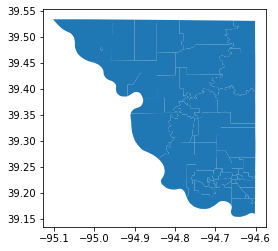

In [53]:
platte_shape = gp.read_file("./raw-from-source/Census/2020_VTD/tl_2020_29_all/tl_2020_29165_vtd20.shp")
platte_shape.plot()

#Platte County
platte_shape["unique_ID"] = "165"+"-"+platte_shape["NAME20"]
platte_shape["unique_ID"] = platte_shape["unique_ID"].str.strip()
platte_shape = platte_shape[["unique_ID","geometry"]]
platte_shape["VTDST"] = ""
platte_shape["NAMELSAD"] = ""
platte_shape["NAME"] = ""

### 4. Counties themselves
> The following counties instead used maps or shapefiles sourced from the respective county governments:  
Audrain, Bates, Caldwell, Callaway, Camden, Cape Girardeau, Cedar, Cooper, Franklin, Greene, Jackson, Jasper, Jefferson, Laclede, Lafayette, Lawrence, Marion, McDonald, Miller, Nodaway, Osage, Ozark, Pemiscot, Pike, Randolph, Scott, Ste. Genevieve, Texas, Warren, Washington, Worth, Wright.  

Able to find shapefiles for Camden, Cooper, Marion, Lafayette, Laclede, Jasper, Bates, Audrain.  

Of these, only Jasper came in shapefile format. The others came in tif formats that I was unable to load into this notebook without digitizing.

In [54]:
jasper_shape = gp.read_file("./raw-from-source/Counties/Jasper/Voting_Precincts_2020-shp/Voting_Precincts_2020.shp")
print(jasper_shape.shape)

#Jasper County
jasper_shape["unique_ID"] = "097"+"-"+jasper_shape["Precinct"]
jasper_shape["unique_ID"] = jasper_shape["unique_ID"].str.strip()
jasper_shape = jasper_shape[["unique_ID","geometry"]]

jasper_shape["VTDST"] = ""
jasper_shape["NAMELSAD"] = ""
jasper_shape["NAME"] = ""

(74, 10)


- Audrain: https://audraingis.integritygis.com/H5/Index.html?viewer=audrain
- Bates: https://batesgis.integritygis.com/H5/Index.html?viewer=bates
- Caldwell: can't find
- Callaway: can't find
- Camden: https://camdengis.integritygis.com/H5/Index.html?viewer=camden
- Cape Girardeau: only pdf (https://capecountyelections.com/wp-content/uploads/2019/06/Voter_Precincts.pdf)
- Cedar: can't find
- Cooper: https://coopergis.integritygis.com/H5/Index.html?viewer=cooper
- Franklin: can't find
- Greene: not available (https://www.greenecountyassessor.org/assessor/maps/mapadv.aspx)
- Jackson: not downloadable (https://jcebmo.org/wp-content/uploads/JACKSON-COUNTY-TOWNSHIPS-PRECINCTS.pdf)
- Jasper: https://jaspercountymogisintiatives-jcmo.hub.arcgis.com/datasets/voting-precincts-2020
- Jefferson: can't find
- Laclede: https://lacledegis.integritygis.com/H5/Index.html?viewer=laclede
- Lafayette: https://lafayettegis.integritygis.com/H5/Index.html?viewer=lafayette
- Lawrence: not downloadable (https://www.lawrencecountymo.org/elections)
- Marion: https://mariongis.integritygis.com/H5/Index.html?viewer=marion_public
- McDonald: can't find
- Miller: not available (https://millergis.integritygis.com/H5/Index.html?viewer=miller)
- Nodaway: can't find
- Osage: can't find
- Ozark: can't find
- Pemiscot: can't find
- Pike: can't find
- Randolph: can't find
- Scott: not downloadable https://www.arcgis.com/apps/webappviewer/index.html?id=73de0cc0034040a5b8b0f5988a643164
- Ste. Genevieve: can't find
- Texas: can't find
- Warren: not downloadable (https://www.arcgis.com/apps/webappviewer/index.html?id=edfaf72f348b4ea28a959815d82dfe86)
- Washington: can't find
- Worth: can't find
- Wright: can't find

In [55]:
#Create a merged dataframe with these 3
counties_shapes = gp.GeoDataFrame(pd.concat([platte_shape,monroe_shape,jasper_shape,shapefiles_census], axis=0, ignore_index=True))



In [56]:
counties_shapes

,unique_ID,geometry,VTDST,NAMELSAD,NAME
0,165-Barry East 34,"POLYGON ((-94.64014 39.26745, -94.64002 39.267...",,,
1,165-Barry North 40,"POLYGON ((-94.66509 39.26739, -94.66494 39.267...",,,
2,165-Barry South 42,"POLYGON ((-94.64303 39.24480, -94.64302 39.244...",,,
3,165-Beverly 16,"POLYGON ((-94.90947 39.35381, -94.90930 39.354...",,,
4,165-Camden Point 27,"POLYGON ((-94.79877 39.44035, -94.79856 39.440...",,,
...,...,...,...,...,...
1820,510-STL 10-12,"POLYGON Z ((-90.28032 38.62246 0.00000, -90.28...",161012,STL 10-12 Voting District,STL 10-12
1821,510-STL 10-13,"POLYGON Z ((-90.27595 38.62261 0.00000, -90.27...",161013,STL 10-13 Voting District,STL 10-13
1822,510-STL 14-10,"POLYGON Z ((-90.26179 38.59017 0.00000, -90.26...",161410,STL 14-10 Voting District,STL 14-10
1823,510-STL 28-11,"POLYGON Z ((-90.26480 38.64410 0.00000, -90.26...",162811,STL 28-11 Voting District,STL 28-11


In [57]:
counties_shapes["COUNTYFPS"] = counties_shapes["unique_ID"].str[0:3]

In [58]:
counties_w_shapefile_list = list(counties_shapes["COUNTYFPS"].unique())

In [59]:
elections_w_shapefile = mo_allocated[mo_allocated["COUNTYFP"].isin(counties_w_shapefile_list)]

In [60]:
elections_w_shapefile

candidate,unique_ID,COUNTYFP,precinct,county,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20GOVRPAR,G20GOVDGAL,G20GOVLCOM,G20GOVGBAU,G20LTGRKEH,G20LTGDCAN,G20LTGLSLA,G20LTGGDRA,G20ATGRSCH,G20ATGDFIN,G20ATGLBAB,G20SOSRASH,G20SOSDFAL,G20SOSLFRE,G20SOSGLEH,G20SOSCVEN,G20TRERFIT,G20TREDENG,G20TRELKAS,G20TREGCIV
1,001-BRASHEAR,001,BRASHEAR-FAIRGROUNDS,Adair,818,159,8,0,3,836,139,10,2,832,117,8,5,825,134,11,873,88,4,4,4,831,123,6,3
3,001-NORTHEAST 4,001,NE4-ANNEX,Adair,467,464,12,12,0,469,467,15,2,481,430,16,13,481,417,34,531,374,14,16,2,491,410,23,13
4,001-NORTHEAST 5,001,NE5-LIBRARY,Adair,514,323,16,4,3,553,303,5,2,525,315,16,1,543,286,20,584,250,17,2,1,543,283,15,3
5,001-NORTHEAST 6,001,NE6-NAZARENE,Adair,656,444,28,2,1,700,417,11,3,695,398,13,8,688,383,32,749,342,13,9,3,698,392,12,7
6,001-NOVINGER,001,NOVINGER,Adair,1114,202,11,0,3,1135,178,16,7,1111,169,23,10,1124,158,27,1173,119,22,7,4,1117,161,16,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,510-STL 28-7,510,W 28 P 07,St. Louis City,67,491,5,2,0,83,478,6,0,88,458,8,3,90,460,10,94,456,6,2,1,92,452,8,0
3698,510-STL 28-8,510,W 28 P 08,St. Louis City,115,810,12,3,1,133,798,5,1,147,757,12,5,153,749,16,156,744,14,6,0,148,741,22,3
3699,510-STL 28-9,510,W 28 P 09,St. Louis City,75,378,3,1,0,79,371,0,1,85,359,3,4,90,351,2,88,355,5,2,0,94,341,4,4
3700,510-STL 28-10,510,W 28 P 10,St. Louis City,145,735,7,4,0,170,715,9,2,175,683,12,6,185,677,15,190,681,9,2,0,200,657,11,3


In [61]:
counties_shapes = counties_shapes.dissolve("unique_ID")

In [62]:
counties_shapes.reset_index(inplace=True,drop=False)

In [63]:
source_shape_join = pd.merge(counties_shapes,elections_w_shapefile,how="outer",on="unique_ID",validate="1:1",indicator=True)

In [64]:
source_shape_join["_merge"].value_counts()

left_only     947
both          873
right_only    575
Name: _merge, dtype: int64

In [65]:
source_shape_join[source_shape_join["_merge"]=="left_only"].to_csv("./exported/final_shapes.csv")
source_shape_join[source_shape_join["_merge"]=="right_only"].to_csv("./exported/final_elections.csv")